In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://uspdigital.usp.br/jupiterweb/jupDisciplinaLista?codcg=60&pfxdisval=CGF&tipo=D"
response = requests.get(url)

In [ ]:
response.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<title>Jupiterweb</title>\r\n<meta http-equiv=Content-Type content="text/html; charset=iso-8859-1">\r\n<meta HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE">\r\n<meta HTTP-EQUIV="Expires" CONTENT="-1">\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="shortcut icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/libs/usp/main/1.0/menuweb.css"\r\n\ttype=text/css rel=stylesheet>\r\n</head>\r\n<style>\r\n#layout_principal {\r\n\twidth: 100%;\r\n}\r\n\r\n#layout_cabecalho {\r\n\r\n}\r\n\r\n#layout_menu {\r\n\twidth: 170px;\r\n\tfloat: left;\r\n\tpadding-top: 10px;\r\n}\r\n\r\n#layout_conteudo {\r\n\tpadding-left: 181px;\r\n\tpadding-top: 10px;\r\n}\r\n</style>\r\n<!--[if IE]>\r\

In [2]:
soup = BeautifulSoup(response.text, 'lxml') # Parse the HTML as a string

tables = soup.find_all('table') # Grab the first table

row_list = []
for table in tables:
  for row in table.find_all('tr'):
      column_list = []
      columns = row.find_all('td')
      for column in columns:
          column_list.append(column.get_text())
      row_list.append(column_list)

row_list

[['\n\n', '\n\n'],
 ['\r\n       Sigla',
  '\r\n       Nome',
  '\r\n       Ativação',
  '\r\n       Desativação'],
 ['\r\n        CGF2036',
  '\nAnálise Química I: Físico-Química\n',
  '\r\n        01/01/2017',
  '\n'],
 ['\r\n        CGF2049',
  '\nAnálise Química II: Físico Química\n',
  '\r\n        15/07/2020',
  '\n'],
 ['\r\n        CGF2028',
  '\nAnálise Química: Reações Químicas\n',
  '\r\n        01/01/2023',
  '\n'],
 ['\r\n        CGF2088',
  '\nAnálise Toxicológica\n',
  '\r\n        15/07/2022',
  '\n'],
 ['\r\n        CGF2107',
  '\nAssistência Farmacêutica\n',
  '\r\n        15/07/2024',
  '\n'],
 ['\r\n        CGF2091',
  '\nAssistência Farmacêutica I\n',
  '\r\n        15/07/2020',
  '\n'],
 ['\r\n        CGF2092',
  '\nAssistência Farmacêutica II\n',
  '\r\n        15/07/2020',
  '\n'],
 ['\r\n        CGF2059',
  '\nAssistência Farmacêutica: Gestão e Dispensação no Serviço Público\n',
  '\r\n        01/01/2017',
  '\n'],
 ['\r\n        CGF2078',
  '\nAtenção Diagnóst

In [3]:
len(table)

3

In [6]:
url_course = "https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=CGF2022"
response_course = requests.get(url_course)
response_course.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<title>Jupiterweb</title>\r\n<meta http-equiv=Content-Type content="text/html; charset=iso-8859-1">\r\n<meta HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE">\r\n<meta HTTP-EQUIV="Expires" CONTENT="-1">\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="shortcut icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/libs/usp/main/1.0/menuweb.css"\r\n\ttype=text/css rel=stylesheet>\r\n</head>\r\n<style>\r\n#layout_principal {\r\n\twidth: 100%;\r\n}\r\n\r\n#layout_cabecalho {\r\n\r\n}\r\n\r\n#layout_menu {\r\n\twidth: 170px;\r\n\tfloat: left;\r\n\tpadding-top: 10px;\r\n}\r\n\r\n#layout_conteudo {\r\n\tpadding-left: 181px;\r\n\tpadding-top: 10px;\r\n}\r\n</style>\r\n<!--[if IE]>\r\

In [19]:
with open('course.txt', 'w') as f:
    f.write(response_course.text)

In [5]:
type(response_course.text)

str

In [2]:
import re

In [23]:
print(re.search('Docente', response_course.text))

<re.Match object; span=(33348, 33355), match='Docente'>


In [28]:
response_course.text[33348:33600]

'Docente(s) Responsável(eis)</b></span></font></td>\r\n    </tr>\r\n    <tr>\r\n      <td> \r\n        <table border="0" >\r\n\t    \r\n          <tr> \r\n            <td><font face="Verdana, Arial, Helvetica, sans-serif" size="1" color="#666666"><span class="txt_aria'

In [14]:
sdisc = re.search('<b>Disciplina: CGF2022 .+</b></span>', response_course.text)
sdisc.span()

(29157, 29209)

In [ ]:
response_course.text[29157:29209]

'<b>Disciplina: CGF2022 - Bioestatística I</b></span>'

In [13]:
re.sub(r'<b>Disciplina\: (.+)</b></span>', r'\1', response_course.text[29157:29209])

'CGF2022 - Bioestatística I'

In [ ]:
re.sub(r'Ri(.{3})do', r'\1', 'Ricardo')

'car'

In [3]:
def getCourseInfo(course_code):
    info = {}
    url_course = f"https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis={course_code}"
    response_course = requests.get(url_course)
    sdisc = re.search(f'<b>Disciplina: {course_code} .+</b></span>', response_course.text)
    info['name'] = re.sub(r'<b>Disciplina\: (.+)</b></span>', r'\1', response_course.text[sdisc.span()[0]:sdisc.span()[1]])
    return info

In [4]:
getCourseInfo('CGF2022')

{'name': 'CGF2022 - Bioestatística I'}

In [7]:
soup = BeautifulSoup(response_course.text, 'lxml') # Parse the HTML as a string

tabs = soup.find_all('table')
len(tabs)

19

In [9]:
tabs = soup.find_all('table')
row_list = []
for tab in tabs:
  for row in tab.find_all('tr'):
      column_list = []
      columns = row.find_all('td')
      for column in columns:
          column_list.append(column.get_text())
      row_list.append(column_list)

row_list

[['\n\n', '\n\n'],
 ['\n\n'],
 ['\n'],
 ['\n'],
 ['\n\n\n\n\n\n\n\n\n\n\n\xa0Preparar para impressão\xa0\n\n\n\n\n\n\n\n\n\n\n\r\n\t\t\tJúpiter - Sistema de Gestão Acadêmica da Pró-Reitoria de Graduação\r\n\t\t\n\n\n\n\n\n\n \r\n\t    Faculdade de Ciências Farmacêuticas de Ribeirão Preto\n\n\n\xa0\n\n\n \r\n\t    Disciplinas Interdepartamentais da FCFRP\n\n\n\xa0\n\n\n\nDisciplina: CGF2022 - Bioestatística I\n\n\n\n \r\n         Biostatistics I \n\n\n\n\n\n\n\nCréditos Aula:\n \r\n        2\r\n\t\t\n\n\n \r\n        Créditos Trabalho:\n \r\n        0\n\n\n \r\n        Carga Horária Total: \n \r\n       \t\t30 h \r\n \t\t\t\r\n\t\t\t \r\n\t\t\t\t\t\n\n\n\nTipo:\n \r\n\t   \r\n\t   \r\n\t   Semestral\r\n\t   \r\n\t   \r\n\t   \t   \r\n\t   \n\n\n \r\n                    Ativação: \n \r\n        15/07/2020 \r\n\t\t\nDesativação:\n\n\n\n\n\n\n\nObjetivos \n\n\n\nFornecer aos alunos os principais conceitos em Bioestatística, necessários para utilização em disciplinas específicas e para sua 

In [20]:
import itertools
fulllist = itertools.chain(*row_list)
list(fulllist)

['\n\n',
 '\n\n',
 '\n\n',
 '\n',
 '\n',
 '\n\n\n\n\n\n\n\n\n\n\n\xa0Preparar para impressão\xa0\n\n\n\n\n\n\n\n\n\n\n\r\n\t\t\tJúpiter - Sistema de Gestão Acadêmica da Pró-Reitoria de Graduação\r\n\t\t\n\n\n\n\n\n\n \r\n\t    Faculdade de Ciências Farmacêuticas de Ribeirão Preto\n\n\n\xa0\n\n\n \r\n\t    Disciplinas Interdepartamentais da FCFRP\n\n\n\xa0\n\n\n\nDisciplina: CGF2022 - Bioestatística I\n\n\n\n \r\n         Biostatistics I \n\n\n\n\n\n\n\nCréditos Aula:\n \r\n        2\r\n\t\t\n\n\n \r\n        Créditos Trabalho:\n \r\n        0\n\n\n \r\n        Carga Horária Total: \n \r\n       \t\t30 h \r\n \t\t\t\r\n\t\t\t \r\n\t\t\t\t\t\n\n\n\nTipo:\n \r\n\t   \r\n\t   \r\n\t   Semestral\r\n\t   \r\n\t   \r\n\t   \t   \r\n\t   \n\n\n \r\n                    Ativação: \n \r\n        15/07/2020 \r\n\t\t\nDesativação:\n\n\n\n\n\n\n\nObjetivos \n\n\n\nFornecer aos alunos os principais conceitos em Bioestatística, necessários para utilização em disciplinas específicas e para sua atuação 

In [23]:
fulltxt = ' '.join(list(itertools.chain(*row_list)))

In [24]:
fulltxt

'\n\n \n\n \n\n \n \n \n\n\n\n\n\n\n\n\n\n\n\xa0Preparar para impressão\xa0\n\n\n\n\n\n\n\n\n\n\n\r\n\t\t\tJúpiter - Sistema de Gestão Acadêmica da Pró-Reitoria de Graduação\r\n\t\t\n\n\n\n\n\n\n \r\n\t    Faculdade de Ciências Farmacêuticas de Ribeirão Preto\n\n\n\xa0\n\n\n \r\n\t    Disciplinas Interdepartamentais da FCFRP\n\n\n\xa0\n\n\n\nDisciplina: CGF2022 - Bioestatística I\n\n\n\n \r\n         Biostatistics I \n\n\n\n\n\n\n\nCréditos Aula:\n \r\n        2\r\n\t\t\n\n\n \r\n        Créditos Trabalho:\n \r\n        0\n\n\n \r\n        Carga Horária Total: \n \r\n       \t\t30 h \r\n \t\t\t\r\n\t\t\t \r\n\t\t\t\t\t\n\n\n\nTipo:\n \r\n\t   \r\n\t   \r\n\t   Semestral\r\n\t   \r\n\t   \r\n\t   \t   \r\n\t   \n\n\n \r\n                    Ativação: \n \r\n        15/07/2020 \r\n\t\t\nDesativação:\n\n\n\n\n\n\n\nObjetivos \n\n\n\nFornecer aos alunos os principais conceitos em Bioestatística, necessários para utilização em disciplinas específicas e para sua atuação profissional, incluin

In [28]:
re.search('Disciplina: .+\n', fulltxt)

<re.Match object; span=(266, 305), match='Disciplina: CGF2022 - Bioestatística I\n'>

In [34]:
fulltxt[266:305]

'Disciplina: CGF2022 - Bioestatística I\n'

In [32]:
re.sub(r'Disciplina: (.+)\n', r'\1', fulltxt[266:305])

'CGF2022 - Bioestatística I'

In [46]:
re.search('Créditos Aula: \s+\d+', fulltxt)

<re.Match object; span=(7448, 7475), match='Créditos Aula:  \r\n        2'>

In [45]:
fulltxt[7448:7475]

'Créditos Aula:  \r\n        2'

In [47]:
re.sub(r'Créditos Aula: \s+(\d+)', r'\1', fulltxt[7448:7475])

'2'

In [48]:
re.search('Créditos Trabalho: \s+\d+', fulltxt)

<re.Match object; span=(7491, 7522), match='Créditos Trabalho:  \r\n        0'>

In [50]:
fulltxt[7491:7522]

'Créditos Trabalho:  \r\n        0'

In [52]:
re.sub(r'Créditos Trabalho: \s+(\d+)', r'\1', fulltxt[7491:7522])

'0'

In [61]:
re.search('Carga Horária Total:\s+.+h', fulltxt)

<re.Match object; span=(434, 472), match='Carga Horária Total: \n \r\n       \t\t30 h'>

In [62]:
fulltxt[434:472]

'Carga Horária Total: \n \r\n       \t\t30 h'

In [64]:
re.sub(r'\D', '', fulltxt[434:472])

'30'

In [70]:
re.search('Docente\(s\) Responsável\(eis\)', fulltxt)

<re.Match object; span=(963, 990), match='Docente(s) Responsável(eis)'>

In [71]:
re.search('Programa Resumido', fulltxt)

<re.Match object; span=(1061, 1078), match='Programa Resumido'>

In [72]:
fulltxt[963:1061]

'Docente(s) Responsável(eis)\n\n\n\n\n\n\n \r\n              6293113 - Ricardo Roberto da Silva\n\n\n\n\n\n\xa0\n\n\n\n\n\n'

In [85]:
re.sub(r'Docente\(s\) Responsável\(eis\)\s+(\d+\w+)\s+', r'\1', fulltxt[963:1061]).strip()

'6293113- Ricardo Roberto da Silva'

In [82]:
re.search('Programa\n', fulltxt)

<re.Match object; span=(1555, 1564), match='Programa\n'>

In [84]:
fulltxt[1061:1555].strip()

'Programa Resumido\n\n\n\nEsta disciplina compreende a coleta e organização de dados, identificação e classificação das variáveis em estudo, apresentação dos resultados em tabelas e/ou gráficos a fim de executar uma análise exploratória dos mesmos. Analise e distribuição de frequências de uma ou mais variáveis qualitativas e quantitativas. Investigação da associação entre variáveis qualitativas e quantitativas. Cálculo de probabilidades para eventos dependentes e independentes.'

In [86]:
re.sub(r'Programa Resumido\s+(\w+)', r'\1', fulltxt[1061:1555]).strip()

'Esta disciplina compreende a coleta e organização de dados, identificação e classificação das variáveis em estudo, apresentação dos resultados em tabelas e/ou gráficos a fim de executar uma análise exploratória dos mesmos. Analise e distribuição de frequências de uma ou mais variáveis qualitativas e quantitativas. Investigação da associação entre variáveis qualitativas e quantitativas. Cálculo de probabilidades para eventos dependentes e independentes.'

In [87]:
re.search('Avaliação\n', fulltxt)

<re.Match object; span=(2085, 2095), match='Avaliação\n'>

In [88]:
fulltxt[1555:2085]

'Programa\n\n\n\nIntrodução à Estatística; - População e amostra; - Escalas de medida; - Variáveis e sua classificação; - Distribuição de frequências; - Tabelas e gráficos; - Análise de uma distribuição de frequências a duas variáveis qualitativas; - Estudo da associação em tabelas 2x2 e rxs; - Análise de uma distribuição de frequências a duas variáveis quantitativas; - Medidas de posição e de variabilidade; - Correlação linear. Teoria elementar de Probabilidade; - Distribuição de Probabilidade Binomial e Normal.\n\n\xa0\n\n \n\n\n\xa0\n\n\xa0\n\n\n\n'

In [89]:
re.sub(r'Programa\s+(\w+)', r'\1', fulltxt[1555:2085]).strip()

'Introdução à Estatística; - População e amostra; - Escalas de medida; - Variáveis e sua classificação; - Distribuição de frequências; - Tabelas e gráficos; - Análise de uma distribuição de frequências a duas variáveis qualitativas; - Estudo da associação em tabelas 2x2 e rxs; - Análise de uma distribuição de frequências a duas variáveis quantitativas; - Medidas de posição e de variabilidade; - Correlação linear. Teoria elementar de Probabilidade; - Distribuição de Probabilidade Binomial e Normal.'

In [90]:
re.search('Bibliografia\n', fulltxt)

<re.Match object; span=(2946, 2959), match='Bibliografia\n'>

In [91]:
fulltxt[2085:2946]

'Avaliação\n\n\n\n\n\xa0\xa0\xa0\xa0\xa0\n \n\n\nMétodo\n\n\n \r\n        Aula expositiva dialogada; Aprendizagem baseada em Problemas  e Resolução de exercícios.\n\n\n\nCritério\n\n\n \r\n        \nO aluno deverá mostrar ter atingido os objetivos gerais e específicos do módulo através de aprovação revelada por um escore de 0 a 10. Os instrumentos de avaliação serão: \n- duas Provas com questões objetivas, escritas e individuais, sendo que a primeira terá peso 2 e a segunda peso 3.\n- Listas de Exercícios em grupos e/ou individuais, e/ou aplicações no TCC1 do aluno, com peso 1.\n\nCritério de avaliação: Será aprovado o aluno que obtiver média igual ou superior a 5,0, calculada pela fórmula:\n\nM= (E+2.P1+3.P2)/6\nOnde: E é a nota das listas de Exercícios e/ou aplicações no TCC1, P1 é a nota da primeira prova e P2 é a nota da segunda prova.\n\n\n\n\nNorma de Recuperação\n\n\n \r\n        Prova\n\n\n\n\n\n\n\n\n\xa0\n\n\n'

In [92]:
re.sub(r'Avaliação\s+(\w+)', r'\1', fulltxt[2085:2946]).strip()

'Método\n\n\n \r\n        Aula expositiva dialogada; Aprendizagem baseada em Problemas  e Resolução de exercícios.\n\n\n\nCritério\n\n\n \r\n        \nO aluno deverá mostrar ter atingido os objetivos gerais e específicos do módulo através de aprovação revelada por um escore de 0 a 10. Os instrumentos de avaliação serão: \n- duas Provas com questões objetivas, escritas e individuais, sendo que a primeira terá peso 2 e a segunda peso 3.\n- Listas de Exercícios em grupos e/ou individuais, e/ou aplicações no TCC1 do aluno, com peso 1.\n\nCritério de avaliação: Será aprovado o aluno que obtiver média igual ou superior a 5,0, calculada pela fórmula:\n\nM= (E+2.P1+3.P2)/6\nOnde: E é a nota das listas de Exercícios e/ou aplicações no TCC1, P1 é a nota da primeira prova e P2 é a nota da segunda prova.\n\n\n\n\nNorma de Recuperação\n\n\n \r\n        Prova'

In [97]:
re.search('Clique', fulltxt)

<re.Match object; span=(3444, 3450), match='Clique'>

In [98]:
re.sub(r'Bibliografia\s+(\w+)', r'\1', fulltxt[2946:3444]).strip()

'1.\tDaniel, W.W. Biostatistcs: A Foundation for Analysis in the Health Sciences. John Wiley & Sons, 10th\nEdition, 2013\n2.\tTriola, M.F. Introdução à Estatística, LTC Livros Técnicos e Científicos, 10ª edição, 2008\n3.\tBussab, W. Estatística Básica, Saraiva. 5ª edição, 2006\n4.\tBerquó, E.S.; Souza, J.M.P.; Gottlieb, S.L.B. Bioestatística, EPU-São Paulo, 1981\n5.     Estatística Básica. Pedro A. Morettin, Wilton O. Bussab. 9a edição - São Paulo: Saraiva, 2017.'

In [122]:
def getCourseInfo(course_code):
    info = {}
    url_course = f"https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis={course_code}"
    response_course = requests.get(url_course)
    soup = BeautifulSoup(response_course.text, 'lxml') # Parse the HTML as a string
    tabs = soup.find_all('table')
    row_list = []
    for tab in tabs:
      for row in tab.find_all('tr'):
          column_list = []
          columns = row.find_all('td')
          for column in columns:
              column_list.append(column.get_text())
          row_list.append(column_list)

    fulltxt = ' '.join(list(itertools.chain(*row_list)))

    sdisc = re.search('Disciplina: .+\n', fulltxt).span()
    info['name'] = re.sub(r'Disciplina: (.+)\n', r'\1', fulltxt[sdisc[0]:sdisc[1]])
    scra = re.search('Créditos Aula: \s+\d+', fulltxt).span()
    info['creditos_aula'] = re.sub(r'Créditos Aula: \s+(\d+)', r'\1', fulltxt[scra[0]:scra[1]])
    scrt = re.search('Créditos Trabalho: \s+\d+', fulltxt).span()
    info['creditos_trabalho'] = re.sub(r'Créditos Trabalho: \s+(\d+)', r'\1', fulltxt[scrt[0]:scrt[1]])
    sch = re.search('Carga Horária Total:\s+.+h', fulltxt).span()
    info['carga_horaria'] = re.sub(r'\D', '', fulltxt[sch[0]:sch[1]])
    sdoc = re.search('Docente\(s\) Responsável\(eis\)', fulltxt).span()
    sprr = re.search('Programa Resumido', fulltxt).span()
    info['docentes'] = re.sub(r'Docente\(s\) Responsável\(eis\)\s+(\d+\w+)\s+', r'\1', fulltxt[sdoc[0]:sprr[0]]).strip()
    spr = re.search('Programa\n', fulltxt).span()
    info['programa_resumido'] = re.sub(r'Programa Resumido\s+(\w+)', r'\1', fulltxt[sprr[1]:spr[0]]).strip()
    sava = re.search('Avaliação\n', fulltxt).span()
    info['programa'] = re.sub(r'Programa\s+(\w+)', r'\1', fulltxt[spr[0]:sava[0]]).strip()
    sbbl = re.search('Bibliografia\n', fulltxt).span()
    info['avaliacao'] = re.sub(r'Avaliação\s+(\w+)', r'\1', fulltxt[sava[0]:sbbl[0]]).strip()
    sclk = re.search('Clique', fulltxt).span()
    info['bibliografia'] = re.sub(r'Bibliografia\s+(\w+)', r'\1', fulltxt[sbbl[0]:sclk[0]]).strip()
    info['requisitos'] = getDependence(course_code)
    return info

In [123]:
getCourseInfo('CGF2022')

{'name': 'CGF2022 - Bioestatística I',
 'creditos_aula': '2',
 'creditos_trabalho': '0',
 'carga_horaria': '30',
 'docentes': '6293113- Ricardo Roberto da Silva',
 'programa_resumido': 'Esta disciplina compreende a coleta e organização de dados, identificação e classificação das variáveis em estudo, apresentação dos resultados em tabelas e/ou gráficos a fim de executar uma análise exploratória dos mesmos. Analise e distribuição de frequências de uma ou mais variáveis qualitativas e quantitativas. Investigação da associação entre variáveis qualitativas e quantitativas. Cálculo de probabilidades para eventos dependentes e independentes.',
 'programa': 'Introdução à Estatística; - População e amostra; - Escalas de medida; - Variáveis e sua classificação; - Distribuição de frequências; - Tabelas e gráficos; - Análise de uma distribuição de frequências a duas variáveis qualitativas; - Estudo da associação em tabelas 2x2 e rxs; - Análise de uma distribuição de frequências a duas variáveis qu

In [124]:
getCourseInfo('CGF2036')

{'name': 'CGF2036 - Análise Química I: Físico-Química',
 'creditos_aula': '4',
 'creditos_trabalho': '1',
 'carga_horaria': '90',
 'docentes': '225196- Alessandra Vincenzi Jager\n\n\n\n \r\n              746812 - Jonas Augusto Rizzato Paschoal\n\n\n\n \r\n              48574 - Luiz Fernando Lopes Guimaraes\n\n\n\n \r\n              1454325 - Paulo Cezar Vieira\n\n\n\n \r\n              89611 - Roberto Santana da Silva\n\n\n\n \r\n              93360 - Rose Mary Zumstein Georgetto Naal\n\n\n\n \r\n              63310 - Zeki Naal',
 'programa_resumido': 'Absorção UV-visível. Luminescência. Espectroscopia atômica. Métodos eletroanalíticos.',
 'programa': '1. Análise gravimétrica: fundamentos, formação de precipitados, operações.\n2. Absorção e Emissão de Luz: Métodos fotométricos: fundamentos, Lei de Lambert-Beer, espectrometria de absorção no UV-visível e emissão (Luminescência), absorciometria, instrumentação. \n3. Cromatografia e Eletroforese Capilar\na) Teórico\ni). Métodos cromatográ

In [109]:
url = 'https://uspdigital.usp.br/jupiterweb/listarCursosRequisitos?coddis=CGF2062'

response = requests.get(url)
response.text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n\r\n\r\n\r\n\r\n<html>\r\n<head>\r\n<title>Jupiterweb</title>\r\n<meta http-equiv=Content-Type content="text/html; charset=iso-8859-1">\r\n<meta HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE">\r\n<meta HTTP-EQUIV="Expires" CONTENT="-1">\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="shortcut icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/imagens/favicon.ico" rel="icon"\r\n\ttype="image/x-icon" />\r\n<link href="https://uspdigital.usp.br/comumwebdev/libs/usp/main/1.0/menuweb.css"\r\n\ttype=text/css rel=stylesheet>\r\n</head>\r\n<style>\r\n#layout_principal {\r\n\twidth: 100%;\r\n}\r\n\r\n#layout_cabecalho {\r\n\r\n}\r\n\r\n#layout_menu {\r\n\twidth: 170px;\r\n\tfloat: left;\r\n\tpadding-top: 10px;\r\n}\r\n\r\n#layout_conteudo {\r\n\tpadding-left: 181px;\r\n\tpadding-top: 10px;\r\n}\r\n</style>\r\n<!--[if IE]>\r\

In [118]:
soup = BeautifulSoup(response.text, 'lxml') # Parse the HTML as a string

tables = soup.find_all('table') # Grab the first table

row_list = []
for table in tables:
  for row in table.find_all('tr'):
      column_list = []
      columns = row.find_all('td')
      for column in columns:
          column_list.append(column.get_text())
      row_list.append(column_list)

row_list

[['\n\n', '\n\n'],
 ['\n\n'],
 ['\n'],
 ['\n \n'],
 ['\n\n\n\n\n\n\n\n\n\n\n\xa0Preparar para impressão\xa0\n\n\n\n\n\n\n\n \r\n                      Lista de Requisitos da Disciplina por Curso\n\n\n\xa0\n\n\n \r\n                      Disciplina: CGF2062-Farmacotécnica, Tecnologia de Medicamentos e Cosméticos V\n\n\n\n\n\n\n\n\nCurso: 60013  Farmácia - Bioquímica \r\n                          (integral) - Período ideal: 8\n\n\nCGF2039 \r\n                          - Farmacotécnica, Tecnologia de Medicamentos e Cosméticos II \n\n\nRequisito \n\n\n\n\nCGF2047 \r\n                          - Farmacotécnica, Tecnologia de Medicamentos e Cosméticos III \n\n\nRequisito \n\n\n\n\nCGF2053 \r\n                          - Farmacotécnica, Tecnologia de Medicamentos e Cosméticos IV \n\n\nRequisito fraco \n\n\n\n\n\xa0\n\xa0\n\xa0\n\xa0\n\n\nCurso: 60014  Farmácia \r\n                          (integral) - Período ideal: 8\n\n\nCGF2039 \r\n                          - Farmacotécnica, Tecnologia de 

In [111]:
fulltxt = ' '.join(list(itertools.chain(*row_list)))

In [117]:
set(re.findall('CGF\d{4}', fulltxt))

{'CGF2039', 'CGF2047', 'CGF2053', 'CGF2062'}

In [119]:
def getDependence(course_code):
    url = f'https://uspdigital.usp.br/jupiterweb/listarCursosRequisitos?coddis={course_code}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml') # Parse the HTML as a string
    tables = soup.find_all('table') # Grab the first table

    row_list = []
    for table in tables:
      for row in table.find_all('tr'):
          column_list = []
          columns = row.find_all('td')
          for column in columns:
              column_list.append(column.get_text())
          row_list.append(column_list)
    fulltxt = ' '.join(list(itertools.chain(*row_list)))
    return list(set(re.findall('CGF\d{4}', fulltxt))-{course_code})

In [126]:
def getCourseList():
    url = "https://uspdigital.usp.br/jupiterweb/jupDisciplinaLista?codcg=60&pfxdisval=CGF&tipo=D"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml') # Parse the HTML as a string
    tables = soup.find_all('table') # Grab the first table

    row_list = []
    for table in tables:
      for row in table.find_all('tr'):
          column_list = []
          columns = row.find_all('td')
          for column in columns:
              column_list.append(column.get_text())
          row_list.append(column_list)
    fulltxt = ' '.join(list(itertools.chain(*row_list)))
    return list(set(re.findall('CGF\d{4}', fulltxt)))

In [120]:
getDependence('CGF2062')

['CGF2039', 'CGF2047', 'CGF2053']

In [121]:
getDependence('CGF2022')

[]

In [125]:
getCourseInfo('CGF2062')

{'name': 'CGF2062 - Farmacotécnica, Tecnologia de Medicamentos e Cosméticos V',
 'creditos_aula': '5',
 'creditos_trabalho': '0',
 'carga_horaria': '75',
 'docentes': '147605- Cristiane Masetto de Gaitani\n\n\n\n \r\n              3157348 - Fabiana Testa Moura de Carvalho Vicentini\n\n\n\n \r\n              59419 - Luis Alexandre Pedro de Freitas\n\n\n\n \r\n              1203996 - Marcia Eliana da Silva Ferreira\n\n\n\n \r\n              88304 - Maria Jose Vieira Fonseca\n\n\n\n \r\n              55669 - Maria Vitoria Lopes Badra Bentley\n\n\n\n \r\n              1299677 - Marilisa Guimarães Lara\n\n\n\n \r\n              2087791 - Osvaldo de Freitas\n\n\n\n \r\n              7410150 - Priscyla Daniely Marcato Gaspari\n\n\n\n \r\n              1894010 - Renata Fonseca Vianna Lopez\n\n\n\n \r\n              2091031 - Wanderley Pereira de Oliveira',
 'programa_resumido': 'O conteúdo programático visa fornecer ao aluno conhecimento nas diferentes técnicas de obtenção e avaliação físico-q

In [127]:
courses = getCourseList()
courses

['CGF2032',
 'CGF2101',
 'CGF2105',
 'CGF2037',
 'CGF2074',
 'CGF2019',
 'CGF2030',
 'CGF2053',
 'CGF2093',
 'CGF2109',
 'CGF2087',
 'CGF2044',
 'CGF2048',
 'CGF2027',
 'CGF2031',
 'CGF2067',
 'CGF2016',
 'CGF2057',
 'CGF2092',
 'CGF2111',
 'CGF2078',
 'CGF2061',
 'CGF2035',
 'CGF2039',
 'CGF2017',
 'CGF2073',
 'CGF2099',
 'CGF2085',
 'CGF2086',
 'CGF2063',
 'CGF2062',
 'CGF2059',
 'CGF2065',
 'CGF2036',
 'CGF2028',
 'CGF2088',
 'CGF2104',
 'CGF2002',
 'CGF2107',
 'CGF2026',
 'CGF2034',
 'CGF2018',
 'CGF2077',
 'CGF2096',
 'CGF2022',
 'CGF2033',
 'CGF2110',
 'CGF2069',
 'CGF2014',
 'CGF2080',
 'CGF2015',
 'CGF2009',
 'CGF2070',
 'CGF2090',
 'CGF2049',
 'CGF2102',
 'CGF2021',
 'CGF2072',
 'CGF2106',
 'CGF2029',
 'CGF2040',
 'CGF2003',
 'CGF2046',
 'CGF2047',
 'CGF2084',
 'CGF2108',
 'CGF2007',
 'CGF2056',
 'CGF2045',
 'CGF2025',
 'CGF2094',
 'CGF2052',
 'CGF2041',
 'CGF2023',
 'CGF2071',
 'CGF2103',
 'CGF2011',
 'CGF2089',
 'CGF2038',
 'CGF2020',
 'CGF2095',
 'CGF2024',
 'CGF2079',
 'CG

In [129]:
len(courses)

91

In [128]:
dcourses = []
for c in courses:
    dcourses.append(getCourseInfo(c))
    print(c)

CGF2032
CGF2101
CGF2105
CGF2037
CGF2074
CGF2019
CGF2030
CGF2053
CGF2093
CGF2109
CGF2087
CGF2044
CGF2048
CGF2027
CGF2031
CGF2067
CGF2016
CGF2057
CGF2092
CGF2111
CGF2078
CGF2061
CGF2035
CGF2039
CGF2017
CGF2073
CGF2099
CGF2085
CGF2086
CGF2063
CGF2062
CGF2059
CGF2065
CGF2036
CGF2028
CGF2088
CGF2104
CGF2002
CGF2107
CGF2026
CGF2034
CGF2018
CGF2077
CGF2096
CGF2022
CGF2033
CGF2110
CGF2069
CGF2014
CGF2080
CGF2015
CGF2009
CGF2070
CGF2090
CGF2049
CGF2102
CGF2021
CGF2072
CGF2106
CGF2029
CGF2040
CGF2003
CGF2046
CGF2047
CGF2084
CGF2108
CGF2007
CGF2056
CGF2045
CGF2025
CGF2094
CGF2052
CGF2041
CGF2023
CGF2071
CGF2103
CGF2011
CGF2089
CGF2038
CGF2020
CGF2095
CGF2024
CGF2079
CGF2013
CGF2100
CGF2054
CGF2004
CGF2083
CGF2008
CGF2091
CGF2050


In [131]:
import json

with open('courses.json', 'w') as f:
    json.dump(dcourses, f, indent=True)

In [132]:
dcourses[0]

{'name': 'CGF2032 - Dinâmica de Grupo',
 'creditos_aula': '2',
 'creditos_trabalho': '0',
 'carga_horaria': '30',
 'docentes': '2088350- Pedro Alves da Rocha Filho',
 'programa_resumido': 'A disciplina abrange os tópicos necessários para que os alunos tenham contato com exercícios de dinâmica de grupo que podem ser empregados nas diferentes empresas, como etapa final do processo seletivo para estagiários.',
 'programa': 'Programa\n\n\n\n- Apresentação.\n- Qualidades & defeitos – como vivenciar.\n- Aparência física.\n- Linguagem corporal, voz.\n- Comunicação – estilo & conteúdo\n- Empresas & grupos.\n- Dinâmicas: jogos & vivências.\n- Técnicas de entrevista.\n- Elaboração do Curriculum vitae.\n- Palestras.',
 'avaliacao': 'Método\n\n\n \r\n        Aplicação de exercícios de dinâmica de grupo, tais como: aula expositiva dialogada; portfólio; tempestade cerebral; dramatização; resolução de exercícios exposições, excursões e visitas; jogos educativos ou gincanas; organização e intencionali

In [138]:
dt = getCourseInfo('CGF2062')
dt['docentes']

'147605- Cristiane Masetto de Gaitani\n\n\n\n \r\n              3157348 - Fabiana Testa Moura de Carvalho Vicentini\n\n\n\n \r\n              59419 - Luis Alexandre Pedro de Freitas\n\n\n\n \r\n              1203996 - Marcia Eliana da Silva Ferreira\n\n\n\n \r\n              88304 - Maria Jose Vieira Fonseca\n\n\n\n \r\n              55669 - Maria Vitoria Lopes Badra Bentley\n\n\n\n \r\n              1299677 - Marilisa Guimarães Lara\n\n\n\n \r\n              2087791 - Osvaldo de Freitas\n\n\n\n \r\n              7410150 - Priscyla Daniely Marcato Gaspari\n\n\n\n \r\n              1894010 - Renata Fonseca Vianna Lopez\n\n\n\n \r\n              2091031 - Wanderley Pereira de Oliveira'

In [137]:
re.sub('\s{2,}', ',', dt['docentes'])

'147605- Cristiane Masetto de Gaitani,3157348 - Fabiana Testa Moura de Carvalho Vicentini,59419 - Luis Alexandre Pedro de Freitas,1203996 - Marcia Eliana da Silva Ferreira,88304 - Maria Jose Vieira Fonseca,55669 - Maria Vitoria Lopes Badra Bentley,1299677 - Marilisa Guimarães Lara,2087791 - Osvaldo de Freitas,7410150 - Priscyla Daniely Marcato Gaspari,1894010 - Renata Fonseca Vianna Lopez,2091031 - Wanderley Pereira de Oliveira'

In [139]:
sdict = []

for d in dcourses:
    d.pop("programa_resumido")
    d.pop("programa")
    d.pop("avaliacao")
    d.pop("bibliografia")
    d["requisitos"] = ', '.join(d["requisitos"])
    d["docentes"] = re.sub('\s{2,}', ',', d['docentes'])
    sdict.append(d)

In [141]:
courses[:5]

['CGF2032', 'CGF2101', 'CGF2105', 'CGF2037', 'CGF2074']

In [142]:
courses.index('CGF2004')

86

In [140]:
import pandas as pd

df = pd.DataFrame(sdict)
df

,name,creditos_aula,creditos_trabalho,carga_horaria,docentes,requisitos
0,CGF2032 - Dinâmica de Grupo,2,0,30,2088350- Pedro Alves da Rocha Filho,
1,CGF2101 - Trabalho de Conclusão de Curso I - E...,2,0,30,"599944- Ana Patricia Yatsuda Natsui,325187 - C...",
2,CGF2105 - Extenfarma I: amplificando a formaçã...,2,2,90,"10172401- Fabiana Rossi Varallo,5023165 - Hosa...",
3,CGF2037 - Bioquímica Experimental,5,1,105,"72554- Carem Gledes Vargas Rechia,5212792 - Ca...","CGF2036, CGF2028, CGF2027"
4,CGF2074 - Farmácia Clínica e Cuidado Farmacêut...,3,0,45,"10172401- Fabiana Rossi Varallo,3084351 - Leon...",
...,...,...,...,...,...,...
86,CGF2004 - Atividades de Extensão,0,1,30,147605- Cristiane Masetto de Gaitani,
87,CGF2083 - Atividades de Extensão,0,1,30,147605- Cristiane Masetto de Gaitani,
88,CGF2008 - Estágio Curricular,2,20,630,"10172401- Fabiana Rossi Varallo,3157348 - Fabi...",
89,CGF2091 - Assistência Farmacêutica I,2,0,30,"10172401- Fabiana Rossi Varallo,3084351 - Leon...",


In [166]:
df.to_csv('courses.csv', index=False)

In [144]:
import numpy as np

n = len(courses)

adj = np.zeros(shape=(n,n))

for i in df.index:
    req = df.loc[i, 'requisitos'].split(', ')
    for r in req:
        if r in courses:
            j = courses.index(r)
            adj[i, j] = 1

In [145]:
adj.sum()

76.0

In [146]:
padj = pd.DataFrame(adj, columns=courses, index=courses)

In [149]:
padj

,CGF2032,CGF2101,CGF2105,CGF2037,CGF2074,CGF2019,CGF2030,CGF2053,CGF2093,CGF2109,...,CGF2024,CGF2079,CGF2013,CGF2100,CGF2054,CGF2004,CGF2083,CGF2008,CGF2091,CGF2050
CGF2032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGF2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGF2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
padj.stack().reset_index()

,level_0,level_1,0
0,CGF2032,CGF2032,0.0
1,CGF2032,CGF2101,0.0
2,CGF2032,CGF2105,0.0
3,CGF2032,CGF2037,0.0
4,CGF2032,CGF2074,0.0
...,...,...,...
8276,CGF2050,CGF2004,0.0
8277,CGF2050,CGF2083,0.0
8278,CGF2050,CGF2008,0.0
8279,CGF2050,CGF2091,0.0


In [151]:
edlst = padj.stack().reset_index()
edlst.columns = ['source', 'target', 'value']
edlst = edlst[edlst['value'] == 1]
edlst

,source,target,value
286,CGF2037,CGF2027,1.0
306,CGF2037,CGF2036,1.0
307,CGF2037,CGF2028,1.0
587,CGF2030,CGF2018,1.0
696,CGF2053,CGF2029,1.0
...,...,...,...
7293,CGF2095,CGF2027,1.0
7294,CGF2095,CGF2031,1.0
7387,CGF2024,CGF2016,1.0
7825,CGF2054,CGF2050,1.0


In [154]:
#https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
import networkx as nx

G = nx.from_pandas_edgelist(edlst)

{'CGF2037': Text(0.14308813062140968, 0.21722759668718253, 'CGF2037'),
 'CGF2027': Text(0.0741176194211459, 0.11014509974110771, 'CGF2027'),
 'CGF2036': Text(0.037859004904104224, 0.3249033932805306, 'CGF2036'),
 'CGF2028': Text(0.2615211691388602, 0.1947171577611492, 'CGF2028'),
 'CGF2030': Text(-0.3532544362148786, 0.025105788911836492, 'CGF2030'),
 'CGF2018': Text(-0.3237958699548861, -0.006208501105870609, 'CGF2018'),
 'CGF2053': Text(-0.3208430866901337, 0.20385757982306352, 'CGF2053'),
 'CGF2029': Text(-0.2443386948549854, 0.16905693931921756, 'CGF2029'),
 'CGF2047': Text(-0.26379271102210144, 0.2082151190170771, 'CGF2047'),
 'CGF2093': Text(-0.03388696381418573, 0.3441394720770432, 'CGF2093'),
 'CGF2026': Text(0.018925553349198095, 0.2352500453560708, 'CGF2026'),
 'CGF2087': Text(-0.6376194466890021, -0.9299999999999999, 'CGF2087'),
 'CGF2086': Text(-0.6002748348201298, -0.8879180711844226, 'CGF2086'),
 'CGF2048': Text(0.22168515219690538, 0.10908509445057968, 'CGF2048'),
 'CGF2

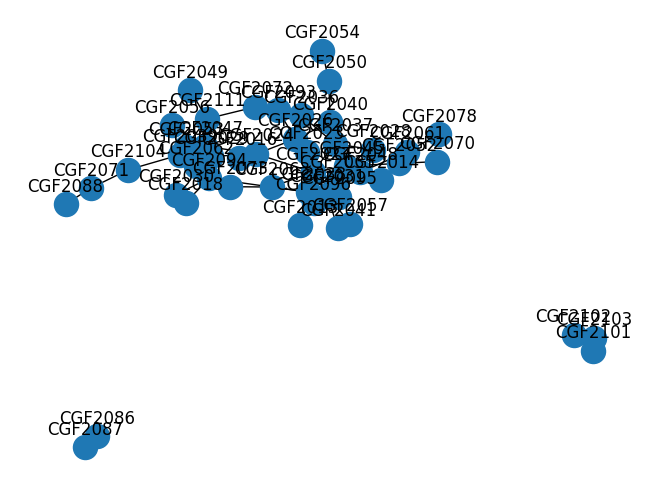

In [164]:
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)

In [158]:
!pip install ipycytoscape

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 76.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [162]:
import ipycytoscape
#import ipywidgets as widgets

undirected = ipycytoscape.CytoscapeWidget()
undirected.graph.add_graph_from_networkx(G)
display(undirected)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [165]:
nx.write_graphml_lxml(G, "requisitos.graphml")

In [163]:
undirected

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [161]:
from google.colab import output
output.disable_custom_widget_manager()